In [58]:
import rioxarray
import geopandas
import leafmap
import geoplot
import geoplot.crs as gcrs
import shapely
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import leafmap

In [59]:
aoi_dir = "data/aoi.geojson"
points = "data/measurements/shp_GA_5513_1739_2022/GA_5513_1739_2022_punkty_czynne_i_archiwalne_m_ilosc_i_bad.shp"

Prepare area of interest

In [60]:
geodf = geopandas.read_file(aoi_dir)

In [61]:
geodf.head()

,FID,geometry
0,0,"POLYGON ((19.17300 51.17912, 19.17346 51.17910..."


In [62]:
geodf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Prepare shp file with measurement points
Points are in epsg2180 crs.

In [63]:
df = geopandas.read_file(points)

In [64]:
df = df.set_crs("EPSG:2180")

In [65]:
df.crs

<Derived Projected CRS: EPSG:2180>
Name: ETRF2000-PL / CS92
Axis Info [cartesian]:
- x[north]: Northing (metre)
- y[east]: Easting (metre)
Area of Use:
- name: Poland - onshore and offshore.
- bounds: (14.14, 49.0, 24.15, 55.93)
Coordinate Operation:
- name: Poland CS92
- method: Transverse Mercator
Datum: ETRF2000 Poland
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [66]:
df = df.to_crs("EPSG:4326")

In [67]:
df['geometry'].head(1)

0    MULTIPOINT (19.17842 50.72782)
Name: geometry, dtype: geometry

In [68]:
df['geometry'] = df['geometry'].explode(index_parts=False)

In [69]:
df.geometry.map(lambda polygon: shapely.ops.transform(lambda x, y: (y, x), polygon))

0     POINT (50.72782 19.17842)
1     POINT (50.85889 18.87222)
2     POINT (50.81599 19.08174)
3     POINT (50.83717 18.92135)
4     POINT (50.75044 19.50739)
                ...            
72    POINT (51.15053 19.13450)
73    POINT (51.09886 19.17081)
74    POINT (51.08769 19.13447)
75    POINT (51.08769 19.13456)
76    POINT (51.10439 19.16253)
Name: geometry, Length: 77, dtype: geometry

In [70]:
df.head(15)

,ID,NR_M_ILOSC,RZAD,NR_OTW_W_S,CZYNNY,ROK_ZAKONC,NR_M_BADAW,WOJ_NAZWA,POW_NAZWA,GM_NAZWA,M_NAZWA,GMRotation,geometry
0,161,126.0,II,1.0,0,1989-01-01,None,l¹skie,bielski,Buczkowice,Zawodzie,0.000000e+00,POINT (19.17842 50.72782)
1,395,472.0,II,1.0,0,2016-01-01,None,l¹skie,k³obucki,Wrêczyca Wielka,Golce,5.336085e-07,POINT (18.87222 50.85889)
2,396,473.0,II,1.0,0,1987-01-01,None,l¹skie,m. Czêstochowa,M. Czêstochowa,Czêstochowa,0.000000e+00,POINT (19.08174 50.81599)
3,411,479.0,II,1.0,0,1986-01-01,None,l¹skie,k³obucki,Wrêczyca Wielka,Wrêczyca,0.000000e+00,POINT (18.92135 50.83717)
4,831,921.0,II,1.0,0,1999-01-01,None,l¹skie,czêstochowski,Przyrów,Sygontka,0.000000e+00,POINT (19.50739 50.75044)
5,832,922.0,II,1.0,0,2013-01-01,None,l¹skie,czêstochowski,Janów,Z³oty Potok,3.600000e+02,POINT (19.41315 50.68703)
6,833,923.0,II,1.0,0,1999-01-01,None,l¹skie,czêstochowski,Janów,Z³oty Potok,0.000000e+00,POINT (19.44182 50.72098)
7,834,924.0,II,1.0,1,None,None,l¹skie,czêstochowski,Janów,Z³oty Potok,0.000000e+00,POINT (19.41204 50.68556)
8,842,928.0,II,1.0,0,1999-01-01,None,l¹skie,czêstochowski,Przyrów,Sygontka,3.600000e+02,POINT (19.47393 50.75678)
9,843,929.0,II,1.0,0,1996-01-01,None,l¹skie,czêstochowski,Przyrów,Julianka,0.000000e+00,POINT (19.50739 50.75044)


<GeoAxesSubplot: >

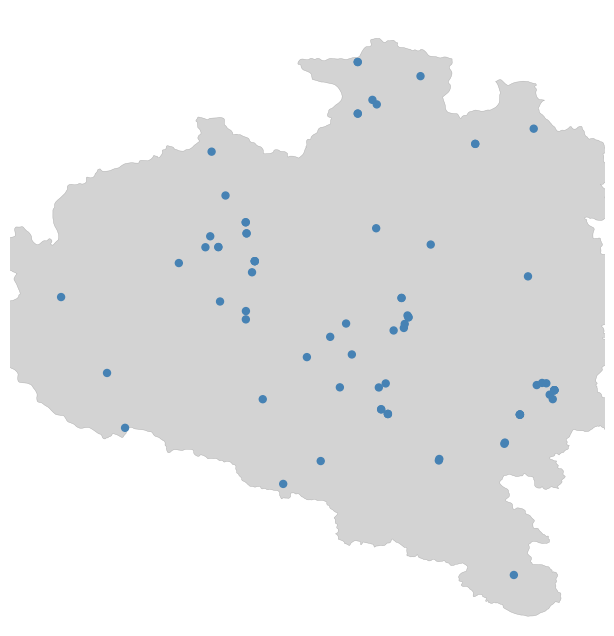

In [71]:
ax = geoplot.polyplot(geodf, projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3,
    figsize=(12, 8))
geoplot.pointplot(df, ax=ax)
#geoplot.show()

<AxesSubplot: >

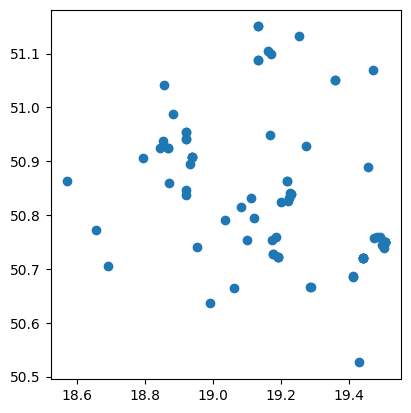

In [72]:
df.plot()

In [83]:
excel_data_dirs = ["data/measurements/GA_5513_1739_2022_monitoring_st_ilosciowego_pomiary_manualne.xls", "data/measurements/GA_5513_1739_2022_monitoring_st_ilosciowego_pomiary_automatyczne.xls"]
excel_data_geojson_dirs = ["data/measurements/GA_5513_1739_2022_quantitative_status_monitoring_manual.json", "data/measurements/GA_5513_1739_2022_quantitative_status_monitoring_automatic.json"]
excel_data = pd.read_excel(excel_data_dirs[0])

In [84]:
excel_data = excel_data.drop(excel_data.index[0])
excel_data.columns = excel_data.iloc[0]
excel_data = excel_data.drop(excel_data.index[0])

In [85]:
excel_data.reset_index(inplace=True)
excel_data.drop("index", inplace=True, axis=1)

In [86]:
excel_data = excel_data.rename(columns = {"Data/Punkty": "date"})

In [87]:
excel_data.head()

1,date,II/112/1,II/113/1,II/114/1,II/115/1,II/116/1,II/131/1,II/132/1,II/292/1,II/297/1,...,II/936/1,II/940/1,II/949/1,II/951/1,II/952/1,II/957/1,II/1345/1,II/1346/1,II/1351/1,II/1352/1
0,2001-11-05 00:00:00,9.65,31.96,29.35,10.58,8.25,16.86,48.15,12.07,5.1,...,0.17,42.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-11-12 00:00:00,9.66,31.91,29.44,10.57,8.19,16.96,48.25,12.05,5.2,...,0.16,42.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-11-19 00:00:00,9.66,31.86,29.3,10.55,8.11,16.91,48.2,12.08,5.2,...,0.2,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001-11-26 00:00:00,9.63,31.8,29.44,10.54,8.03,16.86,48.25,12.07,5,...,0.19,42.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-12-03 00:00:00,9.67,31.83,29.52,10.53,8.08,16.91,48.3,12.08,5,...,0.18,42.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
excel_data["date"] = pd.to_datetime(excel_data["date"], format='%Y-%m-%d %H:%M:%S')

In [89]:
excel_data[excel_data.loc[:, excel_data.columns != "date"].columns] = excel_data[excel_data.loc[:, excel_data.columns != "date"].columns].astype('float64')

In [90]:
excel_data = excel_data.drop(excel_data.index[0])

In [91]:
excel_data.head()

1,date,II/112/1,II/113/1,II/114/1,II/115/1,II/116/1,II/131/1,II/132/1,II/292/1,II/297/1,...,II/936/1,II/940/1,II/949/1,II/951/1,II/952/1,II/957/1,II/1345/1,II/1346/1,II/1351/1,II/1352/1
1,2001-11-12,9.66,31.91,29.44,10.57,8.19,16.96,48.25,12.05,5.2,...,0.16,42.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-11-19,9.66,31.86,29.30,10.55,8.11,16.91,48.20,12.08,5.2,...,0.20,42.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001-11-26,9.63,31.80,29.44,10.54,8.03,16.86,48.25,12.07,5.0,...,0.19,42.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-12-03,9.67,31.83,29.52,10.53,8.08,16.91,48.30,12.08,5.0,...,0.18,42.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2001-12-10,9.69,31.86,29.52,10.52,8.13,16.81,48.25,12.07,5.2,...,0.19,42.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
excel_2020 = excel_data[excel_data["date"].dt.year.eq(2018)]

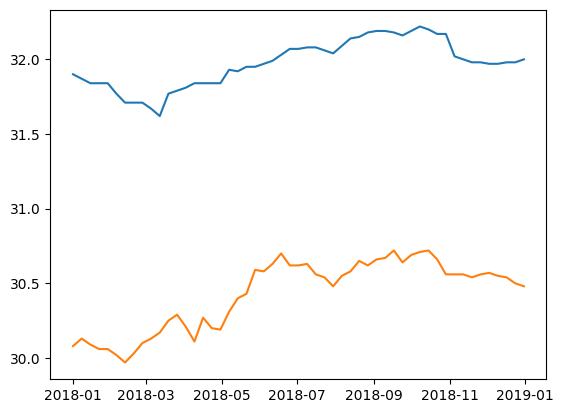

In [93]:
plt.plot(excel_2020["date"], excel_2020["II/113/1"], label="II/113/1")
plt.plot(excel_2020["date"], excel_2020["II/114/1"], label="II/114/1")

In [94]:
corr = excel_data.corr()

<AxesSubplot: xlabel='1', ylabel='1'>

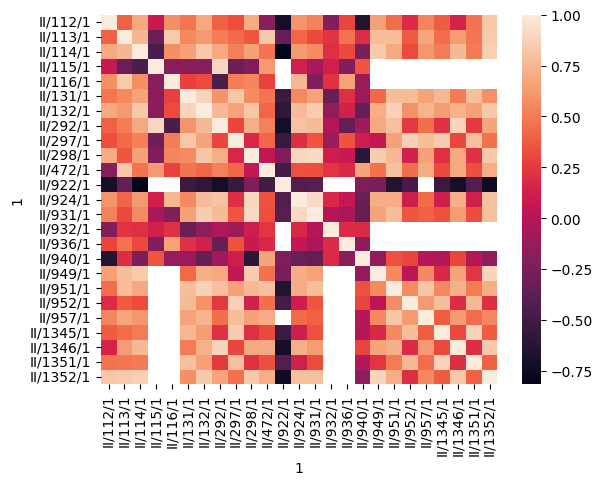

In [95]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [96]:
excel_data_melted = excel_data.melt(id_vars=["date"],
                             var_name="name",
                             value_name="value")

In [97]:
excel_data_melted

,date,name,value
0,2001-11-12,II/112/1,9.66
1,2001-11-19,II/112/1,9.66
2,2001-11-26,II/112/1,9.63
3,2001-12-03,II/112/1,9.67
4,2001-12-10,II/112/1,9.69
...,...,...,...
27370,2022-10-03,II/1352/1,15.67
27371,2022-10-10,II/1352/1,15.66
27372,2022-10-17,II/1352/1,15.69
27373,2022-10-24,II/1352/1,15.70


In [125]:
points_data_dir = "data/measurements/GA_5513_1739_2022_dane_o_punktach_czynnych_i_archiwalnych.xls"

In [126]:
points_data = pd.read_excel(points_data_dir)

In [127]:
points_data.columns

Index(['Identyfikator punktu (ID)',
       'Numer punktu monitoringu stanu ilościowego',
       'Numer punktu monitoringu stanu chemicznego',
       'Numer punktu monitoringu badawczego', 'Numer punktu CBDH',
       'Charakter punktu', 'Rodzaj otworu',
       'Czynny/Nieczynny (monitoring stanu ilościowego)', 'Rok budowy',
       'Współrzędne PUWG 1992 X', 'Współrzędne PUWG 1992 Y',
       'Rzędna terenu [m n.p.m.]', 'Głębokość otworu [m]',
       'Głębokość ostateczna [m]', 'Głębokość zw. nawierconego [m]',
       'Głębokość zw. ustalonego [m]', 'Głębokość ww. strop [m]',
       'Głębokość ww. spąg [m]', 'Stratygrafia (przed 2005)',
       'Stratygrafia (po 2005)', 'Litologia', 'Litologia (opis)',
       'Typ ośrodka',
       'Rok rozpoczęcia obserwacji (monitoring stanu ilościowego)',
       'Rok zakończenia obserwacji (monitoring stanu ilościowego)',
       'Województwo', 'Powiat', 'Gmina', 'Miejscowość', 'JCWPd 172'],
      dtype='object')

In [128]:
points_data = points_data[["Numer punktu monitoringu stanu ilościowego", "Rzędna terenu [m n.p.m.]", "Współrzędne PUWG 1992 X", "Współrzędne PUWG 1992 Y"]]

In [129]:
points_data = points_data.rename(columns = {"Numer punktu monitoringu stanu ilościowego": "name", "Rzędna terenu [m n.p.m.]": "height", "Współrzędne PUWG 1992 X": "longitude", "Współrzędne PUWG 1992 Y": "latitude"}) 

In [147]:
data_merged = pd.merge(excel_data_melted, points_data, on="name")
data_merged["normalized_value"] = data_merged["height"] - data_merged["value"] 

In [148]:
data_merged_gdf = geopandas.GeoDataFrame(data_merged, geometry=geopandas.points_from_xy(data_merged.longitude, data_merged.latitude))

In [149]:
data_merged_gdf = data_merged_gdf.set_crs("EPSG:2180")

In [150]:
data_merged_gdf.crs

<Derived Projected CRS: EPSG:2180>
Name: ETRF2000-PL / CS92
Axis Info [cartesian]:
- x[north]: Northing (metre)
- y[east]: Easting (metre)
Area of Use:
- name: Poland - onshore and offshore.
- bounds: (14.14, 49.0, 24.15, 55.93)
Coordinate Operation:
- name: Poland CS92
- method: Transverse Mercator
Datum: ETRF2000 Poland
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [151]:
data_merged_gdf = data_merged_gdf.to_crs("EPSG:4326")

In [152]:
data_merged_gdf = data_merged_gdf.drop(["longitude", "latitude"], axis=1)

In [154]:
data_merged_gdf

,date,name,value,height,normalized_value,geometry
0,2001-11-12,II/112/1,9.66,252.3,242.64,POINT (18.85332 50.93821)
1,2001-11-19,II/112/1,9.66,252.3,242.64,POINT (18.85332 50.93821)
2,2001-11-26,II/112/1,9.63,252.3,242.67,POINT (18.85332 50.93821)
3,2001-12-03,II/112/1,9.67,252.3,242.63,POINT (18.85332 50.93821)
4,2001-12-10,II/112/1,9.69,252.3,242.61,POINT (18.85332 50.93821)
...,...,...,...,...,...,...
27370,2022-10-03,II/1352/1,15.67,307.3,291.63,POINT (18.95362 50.74014)
27371,2022-10-10,II/1352/1,15.66,307.3,291.64,POINT (18.95362 50.74014)
27372,2022-10-17,II/1352/1,15.69,307.3,291.61,POINT (18.95362 50.74014)
27373,2022-10-24,II/1352/1,15.70,307.3,291.60,POINT (18.95362 50.74014)


In [109]:
file = h5py.File("data/gpm-imerg/3B-MO.MS.MRG.3IMERG.20210101-S000000-E235959.01.V06B.HDF5", "r")

In [110]:
list(file.keys())

['Grid']

In [111]:
data_merged_gdf.describe()

,value
count,19117.000000
mean,18.572306
std,14.436148
min,-0.100000
25%,5.790000
50%,14.500000
75%,31.370000
max,50.300000


In [112]:
data_merged_gdf.isna().sum()

date           0
name           0
value       8258
geometry       0
dtype: int64

In [155]:
def excel_to_geopandas(excel_data_dir, points_data_dir):
    excel_data = pd.read_excel(excel_data_dir)
    excel_data = excel_data.drop(excel_data.index[0])
    excel_data.columns = excel_data.iloc[0]
    excel_data = excel_data.drop(excel_data.index[0])
    excel_data.reset_index(inplace=True)
    excel_data.drop("index", inplace=True, axis=1)
    excel_data = excel_data.rename(columns = {"Data/Punkty": "date"})

    excel_data["date"] = pd.to_datetime(excel_data["date"], format='%Y-%m-%d %H:%M:%S')
    excel_data[excel_data.loc[:, excel_data.columns != "date"].columns] = excel_data[excel_data.loc[:, excel_data.columns != "date"].columns].astype('float64')
    excel_data_melted = excel_data.melt(id_vars=["date"],
                             var_name="name",
                             value_name="value")
    points_data = pd.read_excel(points_data_dir)
    points_data = points_data[["Numer punktu monitoringu stanu ilościowego", "Rzędna terenu [m n.p.m.]", "Współrzędne PUWG 1992 X", "Współrzędne PUWG 1992 Y"]]
    points_data = points_data.rename(columns = {"Numer punktu monitoringu stanu ilościowego": "name", "Rzędna terenu [m n.p.m.]": "height", "Współrzędne PUWG 1992 X": "longitude", "Współrzędne PUWG 1992 Y": "latitude"}) 
    data_merged = pd.merge(excel_data_melted, points_data, on="name")
    data_merged["normalized_value"] = data_merged["height"] - data_merged["value"] 
    gdf = geopandas.GeoDataFrame(data_merged, geometry=geopandas.points_from_xy(data_merged.longitude, data_merged.latitude))
    
    gdf = gdf.set_crs("EPSG:2180")
    gdf = gdf.to_crs("EPSG:4326")
    gdf = gdf.drop(["longitude", "latitude"], axis=1)
    return gdf
    

In [156]:
gdf_manual = excel_to_geopandas(excel_data_dirs[0], points_data_dir)
gdf_auto = excel_to_geopandas(excel_data_dirs[1], points_data_dir)

gdf_manual = gdf_manual.dropna()
gdf_auto = gdf_auto.dropna()


#for i, excel_data in enumerate(excel_data_dirs):
#    gdf = excel_to_geopandas(excel_data, points_data_dir)
#    gdf.to_file(excel_data_geojson_dirs[i], driver="GeoJSON")
    
    
    
gdf = gdf_manual.append(gdf_auto, ignore_index=True)
gdf.drop_duplicates(subset=['date', 'name'], keep='first', inplace=True)

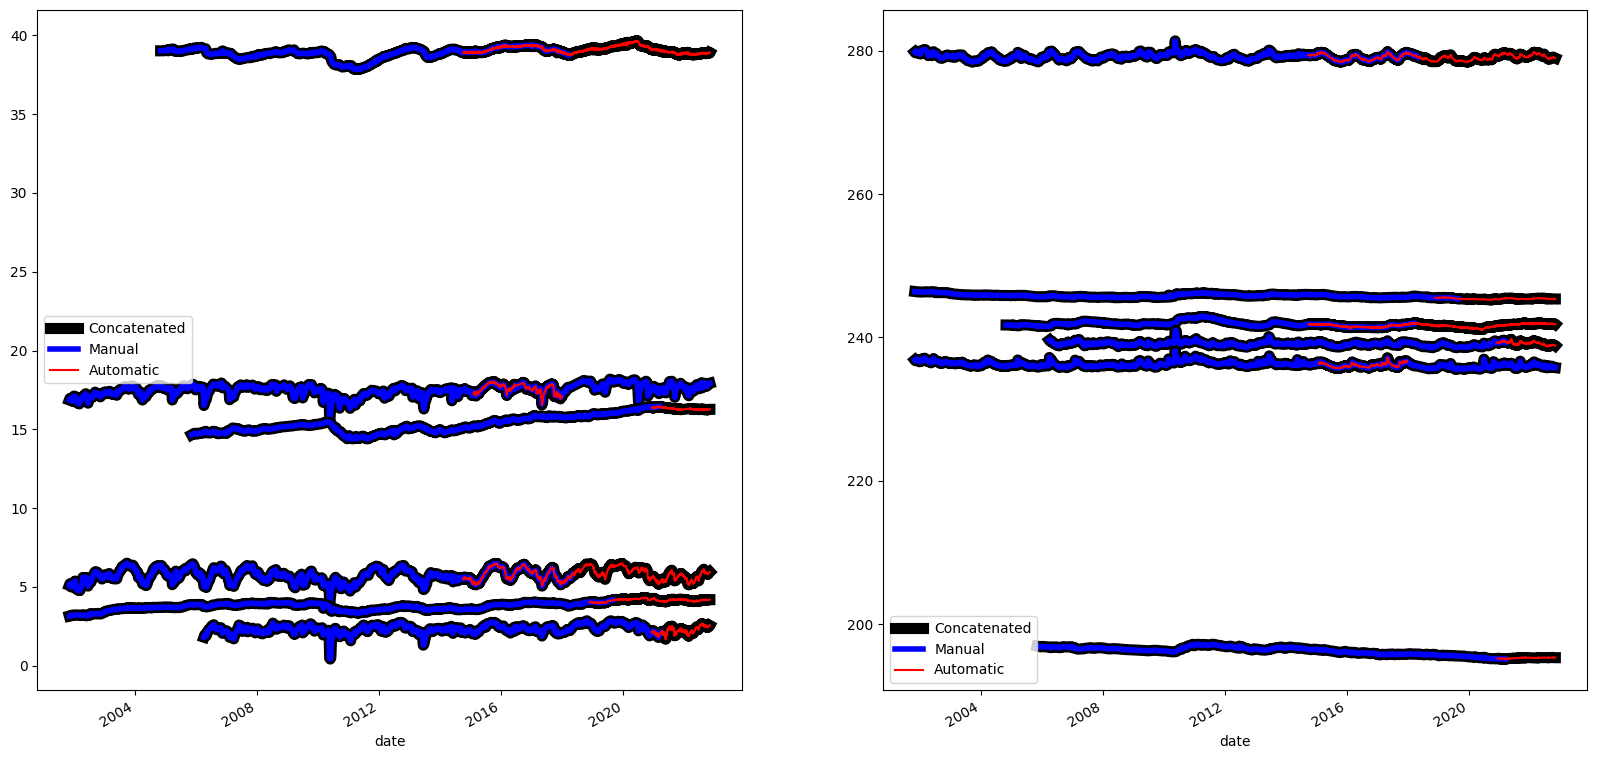

In [184]:
#auto stations are continuation of manual stations
plt.rcParams["figure.figsize"] = (20,10)
fig, axs = plt.subplots(1, 2)
ax = axs[0]
for name in gdf_auto['name'].unique():
    gdf[gdf['name'] == name].plot(kind='line',x='date',y='value',ax=ax, c="black", label="Concatenated", style='-', linewidth=8)
    gdf_manual[gdf_manual['name'] == name].plot(kind='line',x='date',y='value', c="blue", ax=ax, label="Manual", style='-', linewidth=4)
    gdf_auto[gdf_auto['name'] == name].plot(kind='line',x='date',y='value',ax=ax, c="red", label="Automatic", style='-')

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

ax = axs[1]
for name in gdf_auto['name'].unique():
    gdf[gdf['name'] == name].plot(kind='line',x='date',y='normalized_value',ax=ax, c="black", label="Concatenated", style='-', linewidth=8)
    gdf_manual[gdf_manual['name'] == name].plot(kind='line',x='date',y='normalized_value', c="blue", ax=ax, label="Manual", style='-', linewidth=4)
    gdf_auto[gdf_auto['name'] == name].plot(kind='line',x='date',y='normalized_value',ax=ax, c="red", label="Automatic", style='-')

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

plt.show()

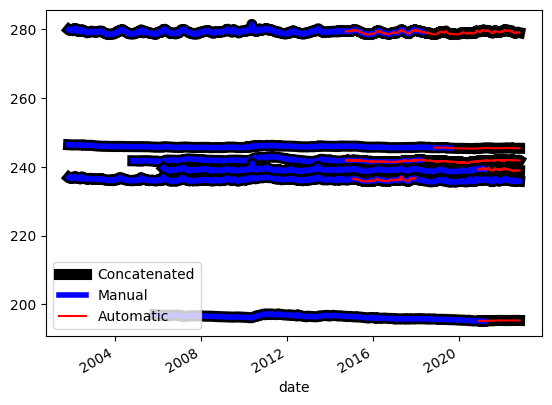

In [163]:
#auto stations are continuation of manual stations
ax = plt.subplots(2)
for name in gdf_auto['name'].unique():
    gdf[gdf['name'] == name].plot(kind='line',x='date',y='normalized_value',ax=ax[0], c="black", label="Concatenated", style='-', linewidth=8)
    gdf_manual[gdf_manual['name'] == name].plot(kind='line',x='date',y='normalized_value', c="blue", ax=ax[0], label="Manual", style='-', linewidth=4)
    gdf_auto[gdf_auto['name'] == name].plot(kind='line',x='date',y='normalized_value',ax=ax[0], c="red", label="Automatic", style='-')

handles, labels = ax[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax[0].legend(by_label.values(), by_label.keys())
plt.show()

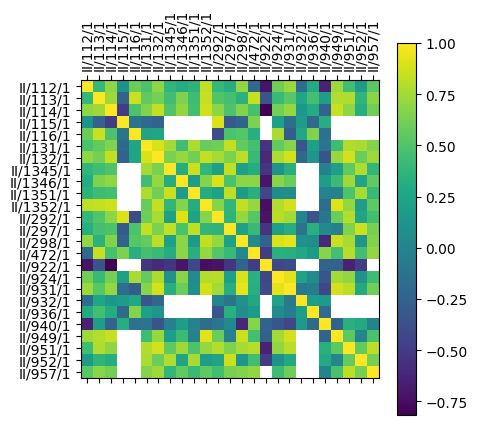

In [164]:
corr = gdf.set_index('date')
corr = corr.pivot(columns='name', values='value')
corr = corr.corr()
#plot correlation matrix
plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()

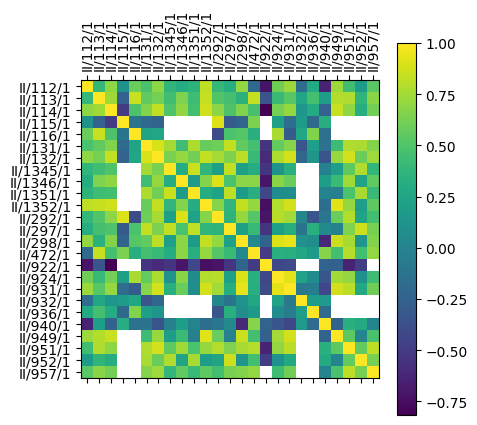

In [165]:
corr = gdf.set_index('date')
corr = corr.pivot(columns='name', values='normalized_value')
corr = corr.corr()
#plot correlation matrix
plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()

In [159]:
m = leafmap.Map()
m.add_gdf(gdf.drop(["date", "value"], axis=1).drop_duplicates(subset="geometry", keep="first"), layer_name="Stations", info_mode="on_click")
m.add_geojson("data/aoi.geojson", layer_name="AOI", info_mode="on_click")
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…